Load data


In [5]:

import numpy as np 
import pandas as pd
from pathlib import Path
import polars as pl
import seaborn as sns

In [6]:
filename = '/home/joelva/code/pgt-group-3/data/raw/Complete_Set/HECTORdataAggregated.parquet'
df = pd.read_parquet(filename)
df.head()


,_timestamp,bat_maximumvoltage_x,bat_maximumvoltage_y,bat_minimumvoltage_y,bat_soc_y,bat_totalcurrent_y,bat_totalvoltage_y,body_active_y,body_emergencystopactivated_y,chas_accpedalpos1000_y,...,h2_fill_all_y,h2_press_all_y,h2_temp_all_y,h2_weight_all_y,hvs3_rx_result_i_value_y,minva_rx_vp_status1_1_actualspeed_y,minva_rx_vp_status1_1_actualtorque_y,minva_rx_vp_status2_1_actualcalcdc_incurrent_y,todisp_drive_temp_motor_y,vbb_30_y
0,2022-08-01 04:04,2022-08-01 04:04:59.770000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,25790.0
1,2022-08-01 04:05,2022-08-01 04:05:59.860000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,25939.0
2,2022-08-01 04:06,2022-08-01 04:06:59.900000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,25939.0
3,2022-08-01 04:07,2022-08-01 04:07:59.860000+00:00,4162.0,4136.0,100.0,26.0,656.0,0.0,1.0,456.0,...,42.0,257.0,23.0,6673.0,38.0,22.0,1942.0,109.0,26.0,27848.0
4,2022-08-01 04:08,2022-08-01 04:08:59.850000+00:00,4169.0,4125.0,100.0,213.0,654.0,0.0,1.0,652.0,...,42.0,257.0,23.0,6670.0,187.0,222.0,3683.0,1958.0,28.0,27886.0


In [7]:
df.describe

<bound method NDFrame.describe of               _timestamp             bat_maximumvoltage_x  \
0       2022-08-01 04:04 2022-08-01 04:04:59.770000+00:00   
1       2022-08-01 04:05 2022-08-01 04:05:59.860000+00:00   
2       2022-08-01 04:06 2022-08-01 04:06:59.900000+00:00   
3       2022-08-01 04:07 2022-08-01 04:07:59.860000+00:00   
4       2022-08-01 04:08 2022-08-01 04:08:59.850000+00:00   
...                  ...                              ...   
145618  2023-04-29 16:00 2023-04-29 16:00:59.960000+00:00   
145619  2023-04-29 16:01 2023-04-29 16:01:59.940000+00:00   
145620  2023-04-29 16:02 2023-04-29 16:02:59.930000+00:00   
145621  2023-04-29 16:03 2023-04-29 16:03:59.970000+00:00   
145622  2023-04-29 16:04 2023-04-29 16:04:35.180000+00:00   

        bat_maximumvoltage_y  bat_minimumvoltage_y  bat_soc_y  \
0                        0.0                   0.0        0.0   
1                        0.0                   0.0        0.0   
2                        0.0          

In [8]:
import duckdb

In [9]:
duckdb.query("SELECT  * FROM df WHERE _timestamp like '%2022-08-01%'").df()

,_timestamp,bat_maximumvoltage_x,bat_maximumvoltage_y,bat_minimumvoltage_y,bat_soc_y,bat_totalcurrent_y,bat_totalvoltage_y,body_active_y,body_emergencystopactivated_y,chas_accpedalpos1000_y,...,h2_fill_all_y,h2_press_all_y,h2_temp_all_y,h2_weight_all_y,hvs3_rx_result_i_value_y,minva_rx_vp_status1_1_actualspeed_y,minva_rx_vp_status1_1_actualtorque_y,minva_rx_vp_status2_1_actualcalcdc_incurrent_y,todisp_drive_temp_motor_y,vbb_30_y
0,2022-08-01 04:04,2022-08-01 06:04:59.770000+02:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,25790.0
1,2022-08-01 04:05,2022-08-01 06:05:59.860000+02:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,25939.0
2,2022-08-01 04:06,2022-08-01 06:06:59.900000+02:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,25939.0
3,2022-08-01 04:07,2022-08-01 06:07:59.860000+02:00,4162.0,4136.0,100.0,26.0,656.0,0.0,1.0,456.0,...,42.0,257.0,23.0,6673.0,38.0,22.0,1942.0,109.0,26.0,27848.0
4,2022-08-01 04:08,2022-08-01 06:08:59.850000+02:00,4169.0,4125.0,100.0,213.0,654.0,0.0,1.0,652.0,...,42.0,257.0,23.0,6670.0,187.0,222.0,3683.0,1958.0,28.0,27886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
706,2022-08-01 15:57,2022-08-01 17:57:59.940000+02:00,3949.0,3924.0,80.0,-31.0,622.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,28007.0
707,2022-08-01 15:58,2022-08-01 17:58:59.930000+02:00,3952.0,3927.0,80.0,-31.0,622.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,28007.0
708,2022-08-01 15:59,2022-08-01 17:59:59.930000+02:00,3954.0,3929.0,80.0,-31.0,622.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,27997.0
709,2022-08-01 16:00,2022-08-01 18:00:59.910000+02:00,3957.0,3932.0,80.0,-31.0,623.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,28007.0


In [10]:
#Make a df based on a specific date or time

df2 = duckdb.query("SELECT  * FROM df WHERE _timestamp like '%2022-08-01%'").df()

In [11]:

# Displaying the original DataFrame
print("Original DataFrame:")
print(df)

# Renaming columns and assigning to a new DataFrame
new_df = df.rename(columns={
    'bat_maximumvoltage_x': 'datetime',
    'bat_soc_y': 'BatSOC',
    'bat_totalcurrent_y': 'BatTotalCurrent',
    'bat_minimumvoltage_y':'BatMinV',
    'bat_totalvoltage_y' : 'BatTotalVoltage',
    'body_active_y' : 'CompOnOff', 
    'body_emergencystopactivated_y': 'StopOnOff', 
    'chas_accpedalpos1000_y': 'ThrottlePerc', 
    'chas_brakepedalpos1000_y': 'BrakePerc', 
    'chas_signal_aircon_sw_y': 'Signal', 
    'bat_maximumvoltage_y_2': 'BatMaxV',
    'chas_weight_axle_1_y': 'FrontAxle', 
    'chas_weight_axle_2_y': 'RearAxle1',
    'chas_weight_axle_3_y': 'RearAxle2', 
    'chas_weight_total_y': 'TotalAxle', 
    'chas_TotalVehicleDistance_m_y': 'TotalDistance', 
    'data_energy_currentenergybody_y': 'CompPower',
    'fcell_2_rx_air_flow_y': 'FC2AirFlow', 
    'fcell_2_rx_cool_temp_y': 'FC2Cool', 
    'fcell_2_rx_stack_current_y': 'FC2Current', 
    'fcell_2_rx_stack_voltage_y': 'FC2Volt', 
    'fcell_3_rx_air_flow_y': 'FC3AirFlow',
    'fcell_3_rx_cool_temp_y': 'FC3Cool', 
    'fcell_3_rx_stack_current_y': 'FC3Current', 
    'fcell_3_rx_stack_voltage_y': 'FC3Volt', 
    'fcell_rx_air_flow_y': 'FC1AirFlow',
    'fcell_rx_cool_temp_y': 'FC1Cool',
    'fcell_rx_stack_current_y': 'FC1Current',
    'gps_altitude_y': 'GPSAltitude',
    'gps_latitude_y': 'GPSLatitude',
    'gps_longitude_y': 'GPDLongitude',
    'h2_fill_all_y': 'H2Perc', 
    'h2_press_all_y': 'H2Press', 
    'h2_temp_all_y': 'H2Temp',
    'h2_weight_all_y': 'H2Weight', 
    'hvs3_rx_result_i_value_y': 'HVACDraw',
    'minva_rx_vp_status1_1_actualspeed_y': 'MotorRPM',
    'minva_rx_vp_status1_1_actualtorque_y': 'MotorTorque',
    'minva_rx_vp_status2_1_actualcalcdc_incurrent_y': 'MotorUseCurrent',
    'todisp_drive_temp_motor_y': 'MotorTemp',
    'vbb_30_y': '24VBatt'

    
}, inplace=False)  # Setting inplace=False to create a new DataFrame

# Displaying the new DataFrame after renaming columns
print("\nNew DataFrame after renaming columns:")
print(new_df)


Original DataFrame:
              _timestamp             bat_maximumvoltage_x  \
0       2022-08-01 04:04 2022-08-01 04:04:59.770000+00:00   
1       2022-08-01 04:05 2022-08-01 04:05:59.860000+00:00   
2       2022-08-01 04:06 2022-08-01 04:06:59.900000+00:00   
3       2022-08-01 04:07 2022-08-01 04:07:59.860000+00:00   
4       2022-08-01 04:08 2022-08-01 04:08:59.850000+00:00   
...                  ...                              ...   
145618  2023-04-29 16:00 2023-04-29 16:00:59.960000+00:00   
145619  2023-04-29 16:01 2023-04-29 16:01:59.940000+00:00   
145620  2023-04-29 16:02 2023-04-29 16:02:59.930000+00:00   
145621  2023-04-29 16:03 2023-04-29 16:03:59.970000+00:00   
145622  2023-04-29 16:04 2023-04-29 16:04:35.180000+00:00   

        bat_maximumvoltage_y  bat_minimumvoltage_y  bat_soc_y  \
0                        0.0                   0.0        0.0   
1                        0.0                   0.0        0.0   
2                        0.0                   0.0  

              _timestamp                         datetime  \
0       2022-08-01 04:04 2022-08-01 04:04:59.770000+00:00   
1       2022-08-01 04:05 2022-08-01 04:05:59.860000+00:00   
2       2022-08-01 04:06 2022-08-01 04:06:59.900000+00:00   
3       2022-08-01 04:07 2022-08-01 04:07:59.860000+00:00   
4       2022-08-01 04:08 2022-08-01 04:08:59.850000+00:00   
...                  ...                              ...   
145618  2023-04-29 16:00 2023-04-29 16:00:59.960000+00:00   
145619  2023-04-29 16:01 2023-04-29 16:01:59.940000+00:00   
145620  2023-04-29 16:02 2023-04-29 16:02:59.930000+00:00   
145621  2023-04-29 16:03 2023-04-29 16:03:59.970000+00:00   
145622  2023-04-29 16:04 2023-04-29 16:04:35.180000+00:00   

        bat_maximumvoltage_y  BatMinV  BatSOC  BatTotalCurrent  \
0                        0.0      0.0     0.0          -3200.0   
1                        0.0      0.0     0.0          -3200.0   
2                        0.0      0.0     0.0          -3200.0   
3  

m

In [12]:
column_names = new_df.columns
print("Column names:")
print(column_names)

Column names:
Index(['_timestamp', 'datetime', 'bat_maximumvoltage_y', 'BatMinV', 'BatSOC',
       'BatTotalCurrent', 'BatTotalVoltage', 'CompOnOff', 'StopOnOff',
       'ThrottlePerc', 'BrakePerc', 'Signal', 'BatMaxV', 'FrontAxle',
       'RearAxle1', 'RearAxle2', 'TotalAxle', 'CompPower', 'FC2AirFlow',
       'FC2Cool', 'FC2Current', 'FC2Volt', 'FC3AirFlow', 'FC3Cool',
       'FC3Current', 'FC3Volt', 'FC1AirFlow', 'FC1Cool', 'FC1Current',
       'fcell_rx_stack_voltage_y', 'GPSAltitude', 'GPSLatitude',
       'GPDLongitude', 'H2Perc', 'H2Press', 'H2Temp', 'H2Weight', 'HVACDraw',
       'MotorRPM', 'MotorTorque', 'MotorUseCurrent', 'MotorTemp', '24VBatt'],
      dtype='object')


In [13]:
new_df

,_timestamp,datetime,bat_maximumvoltage_y,BatMinV,BatSOC,BatTotalCurrent,BatTotalVoltage,CompOnOff,StopOnOff,ThrottlePerc,...,H2Perc,H2Press,H2Temp,H2Weight,HVACDraw,MotorRPM,MotorTorque,MotorUseCurrent,MotorTemp,24VBatt
0,2022-08-01 04:04,2022-08-01 04:04:59.770000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,25790.0
1,2022-08-01 04:05,2022-08-01 04:05:59.860000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,25939.0
2,2022-08-01 04:06,2022-08-01 04:06:59.900000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,25939.0
3,2022-08-01 04:07,2022-08-01 04:07:59.860000+00:00,4162.0,4136.0,100.0,26.0,656.0,0.0,1.0,456.0,...,42.0,257.0,23.0,6673.0,38.0,22.0,1942.0,109.0,26.0,27848.0
4,2022-08-01 04:08,2022-08-01 04:08:59.850000+00:00,4169.0,4125.0,100.0,213.0,654.0,0.0,1.0,652.0,...,42.0,257.0,23.0,6670.0,187.0,222.0,3683.0,1958.0,28.0,27886.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145618,2023-04-29 16:00,2023-04-29 16:00:59.960000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24346.0
145619,2023-04-29 16:01,2023-04-29 16:01:59.940000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24336.0
145620,2023-04-29 16:02,2023-04-29 16:02:59.930000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24346.0
145621,2023-04-29 16:03,2023-04-29 16:03:59.970000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-40.0,24346.0


In [14]:
#add the features for 
#Battery output power (W) = Bat_TotalCurrent_y * Bat_TotalVoltage_y
#Speed (km/h) =MotorRPM*0.175
#Motor power demand (W) = BatTotalVoltage * MINVa_RX_VP_Status2_1_ActualcalcDC_INCurrent_y



# Create a new column by multiplying Column1 and Column2
new_df['BatOutputPower'] = new_df['BatTotalCurrent'] * new_df['BatTotalVoltage']
new_df['Speed'] = new_df['MotorRPM'] * 0.175
new_df['MotorPowerDemand'] = new_df['BatTotalVoltage'] * new_df['MotorUseCurrent']

# Display the DataFrame with the new column
print(new_df)

              _timestamp                         datetime  \
0       2022-08-01 04:04 2022-08-01 04:04:59.770000+00:00   
1       2022-08-01 04:05 2022-08-01 04:05:59.860000+00:00   
2       2022-08-01 04:06 2022-08-01 04:06:59.900000+00:00   
3       2022-08-01 04:07 2022-08-01 04:07:59.860000+00:00   
4       2022-08-01 04:08 2022-08-01 04:08:59.850000+00:00   
...                  ...                              ...   
145618  2023-04-29 16:00 2023-04-29 16:00:59.960000+00:00   
145619  2023-04-29 16:01 2023-04-29 16:01:59.940000+00:00   
145620  2023-04-29 16:02 2023-04-29 16:02:59.930000+00:00   
145621  2023-04-29 16:03 2023-04-29 16:03:59.970000+00:00   
145622  2023-04-29 16:04 2023-04-29 16:04:35.180000+00:00   

        bat_maximumvoltage_y  BatMinV  BatSOC  BatTotalCurrent  \
0                        0.0      0.0     0.0          -3200.0   
1                        0.0      0.0     0.0          -3200.0   
2                        0.0      0.0     0.0          -3200.0   
3  

In [15]:
new_df

,_timestamp,datetime,bat_maximumvoltage_y,BatMinV,BatSOC,BatTotalCurrent,BatTotalVoltage,CompOnOff,StopOnOff,ThrottlePerc,...,H2Weight,HVACDraw,MotorRPM,MotorTorque,MotorUseCurrent,MotorTemp,24VBatt,BatOutputPower,Speed,MotorPowerDemand
0,2022-08-01 04:04,2022-08-01 04:04:59.770000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,25790.0,-0.0,0.00,0.0
1,2022-08-01 04:05,2022-08-01 04:05:59.860000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,25939.0,-0.0,0.00,0.0
2,2022-08-01 04:06,2022-08-01 04:06:59.900000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,25939.0,-0.0,0.00,0.0
3,2022-08-01 04:07,2022-08-01 04:07:59.860000+00:00,4162.0,4136.0,100.0,26.0,656.0,0.0,1.0,456.0,...,6673.0,38.0,22.0,1942.0,109.0,26.0,27848.0,17056.0,3.85,71504.0
4,2022-08-01 04:08,2022-08-01 04:08:59.850000+00:00,4169.0,4125.0,100.0,213.0,654.0,0.0,1.0,652.0,...,6670.0,187.0,222.0,3683.0,1958.0,28.0,27886.0,139302.0,38.85,1280532.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145618,2023-04-29 16:00,2023-04-29 16:00:59.960000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,24346.0,-0.0,0.00,0.0
145619,2023-04-29 16:01,2023-04-29 16:01:59.940000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,24336.0,-0.0,0.00,0.0
145620,2023-04-29 16:02,2023-04-29 16:02:59.930000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,24346.0,-0.0,0.00,0.0
145621,2023-04-29 16:03,2023-04-29 16:03:59.970000+00:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,24346.0,-0.0,0.00,0.0


In [16]:
#find rows where the Motor is not running, the compactor is not used and the battery is not engaged (battery output=0)
duckdb.query("SELECT  * FROM new_df WHERE MotorRPM =0 AND CompOnOff=0 AND BatOutputPower=0").df()

,_timestamp,datetime,bat_maximumvoltage_y,BatMinV,BatSOC,BatTotalCurrent,BatTotalVoltage,CompOnOff,StopOnOff,ThrottlePerc,...,H2Weight,HVACDraw,MotorRPM,MotorTorque,MotorUseCurrent,MotorTemp,24VBatt,BatOutputPower,Speed,MotorPowerDemand
0,2022-08-01 04:04,2022-08-01 06:04:59.770000+02:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,25790.0,-0.0,0.0,0.0
1,2022-08-01 04:05,2022-08-01 06:05:59.860000+02:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,25939.0,-0.0,0.0,0.0
2,2022-08-01 04:06,2022-08-01 06:06:59.900000+02:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,25939.0,-0.0,0.0,0.0
3,2022-08-01 06:42,2022-08-01 08:42:59.870000+02:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,6669.0,0.0,0.0,0.0,0.0,-40.0,26861.0,-0.0,0.0,0.0
4,2022-08-01 06:43,2022-08-01 08:43:59.850000+02:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,6664.0,0.0,0.0,0.0,0.0,-40.0,26628.0,-0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26591,2023-04-29 16:00,2023-04-29 18:00:59.960000+02:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,24346.0,-0.0,0.0,0.0
26592,2023-04-29 16:01,2023-04-29 18:01:59.940000+02:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,24336.0,-0.0,0.0,0.0
26593,2023-04-29 16:02,2023-04-29 18:02:59.930000+02:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,24346.0,-0.0,0.0,0.0
26594,2023-04-29 16:03,2023-04-29 18:03:59.970000+02:00,0.0,0.0,0.0,-3200.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-40.0,24346.0,-0.0,0.0,0.0


In [17]:
#remove rows where the Motor is not running, the compactor is not used and the battery is not engaged (battery output=0)
duckdb.query("SELECT  * FROM new_df WHERE MotorRPM =0 AND CompOnOff=0 AND BatOutputPower=0").df()

# Value to remove
value_to_remove = 0

# Remove rows with the specific value in 'Column1'
new_df1 = new_df[(new_df['MotorRPM'] != value_to_remove) & 
                 (new_df['CompOnOff'] != value_to_remove) & 
                 (new_df['BatOutputPower'] != value_to_remove)]
# Display the updated DataFrame
print(new_df1)

              _timestamp                         datetime  \
10      2022-08-01 04:14 2022-08-01 04:14:59.860000+00:00   
12      2022-08-01 04:16 2022-08-01 04:16:59.870000+00:00   
13      2022-08-01 04:17 2022-08-01 04:17:59.890000+00:00   
14      2022-08-01 04:18 2022-08-01 04:18:59.860000+00:00   
15      2022-08-01 04:19 2022-08-01 04:19:59.860000+00:00   
...                  ...                              ...   
144340  2023-04-27 07:48 2023-04-27 07:48:59.910000+00:00   
144341  2023-04-27 07:49 2023-04-27 07:49:59.880000+00:00   
144342  2023-04-27 07:50 2023-04-27 07:50:59.880000+00:00   
144343  2023-04-27 07:51 2023-04-27 07:51:59.860000+00:00   
144344  2023-04-27 07:52 2023-04-27 07:52:59.890000+00:00   

        bat_maximumvoltage_y  BatMinV  BatSOC  BatTotalCurrent  \
10                    4256.0   4087.0    97.0             69.0   
12                    4208.0   4086.0    96.0             39.0   
13                    4129.0   4087.0    96.0             69.0   
14 

In [18]:
new_df1.shape

(20151, 46)

Check for pearson correlation (-1 to +1 where +1 is perfect correlation) 

1. Calulatie covariation
$$cov(x,y) = \frac{1}{n} \sum_i (x_i - \bar{x})(y_i - \bar{y})$$

2. normalize via dividing by std dev of the variables

$$ r = \frac{cov(x,y)}{\sigma_x \sigma_y}$$

where $\sigma$ is the standard deviation.  The resulting value is the Pearson coefficient. We will use the heatmap for checking thsi between the variables

<Axes: >

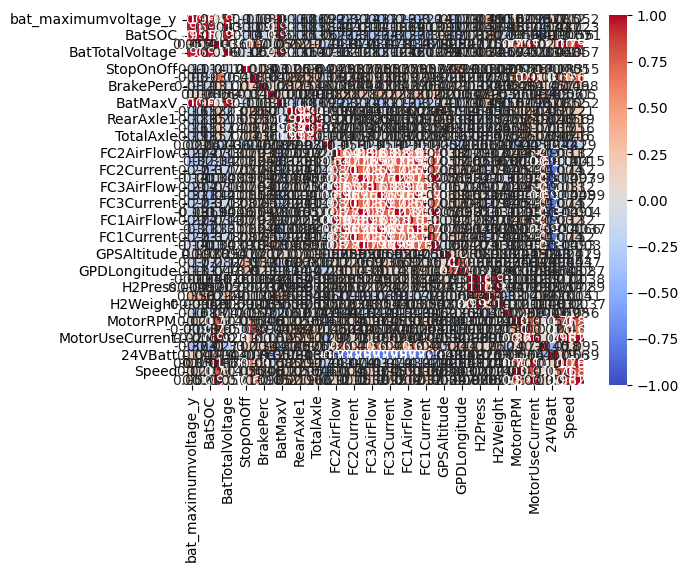

In [19]:
#correlation only between floatvalues for all features in the dataset

floats = new_df1.select_dtypes(include="float64")
correlation_matrix_new_df1 = floats.corr() 

sns.heatmap(correlation_matrix_new_df1, vmin=-1, vmax=1, annot=True, cmap="coolwarm")

This didnt work out, to many parameters...

## Finding correlation through regularization   

 lets start with plotting the correlations. Because we have a 40+  features, this is too much for a heatmap, so we will limit ourselves to the correlation between the features and the BatOutputPower

([], [])

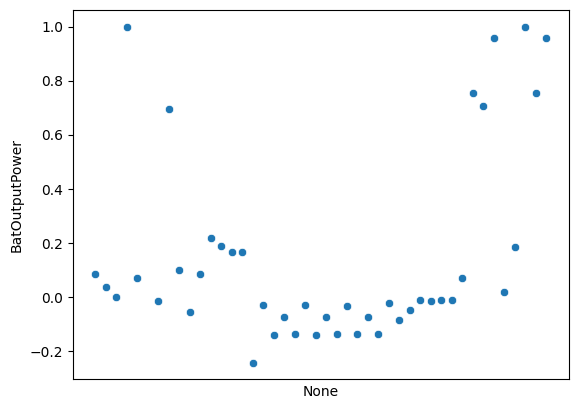

In [20]:
# find erelation with battery output power (as target)
import matplotlib.pyplot as plt


sns.scatterplot(x=correlation_matrix_new_df1.index, y=correlation_matrix_new_df1.BatOutputPower)
plt.xticks([])

the variable 'BatOutputPower' has correlation 1.0 with itself, but we have a number of vriables above 0.5-select these variables

/tmp/ipykernel_600808/2579081575.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (correlation_matrix_new_df1.index[i], correlation_matrix_new_df1.BatOutputPower[i]))


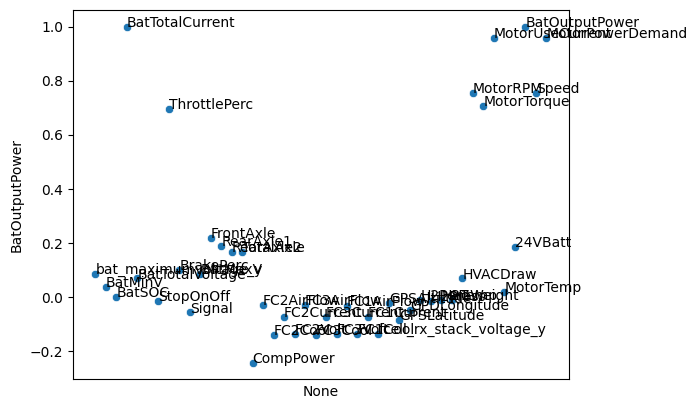

In [21]:
# Your scatter plot code with annotation of the points
sns.scatterplot(x=correlation_matrix_new_df1.index, y=correlation_matrix_new_df1.BatOutputPower)

# Annotating each point with its corresponding feature
for i, txt in enumerate(correlation_matrix_new_df1.index):
    plt.annotate(txt, (correlation_matrix_new_df1.index[i], correlation_matrix_new_df1.BatOutputPower[i]))

plt.xticks([])  # Hide x-axis ticks (if needed)
plt.show()

In [22]:
# Select specific columns to create a new DataFrame
correlation_matrix_new_df2 = correlation_matrix_new_df1[['BatOutputPower', 'BatTotalCurrent', 'ThrottlePerc', 'MotorUseCurrent', 'MotorTorque', 'MotorRPM', 'Speed', 'MotorPowerDemand']]  # Selecting specific columns

# Display the new DataFrame
print(correlation_matrix_new_df2)

                          BatOutputPower  BatTotalCurrent  ThrottlePerc  \
bat_maximumvoltage_y            0.084860         0.055004     -0.029977   
BatMinV                         0.036605         0.004280     -0.089970   
BatSOC                         -0.000675        -0.030674     -0.125135   
BatTotalCurrent                 0.998987         1.000000      0.697489   
BatTotalVoltage                 0.068434         0.036136     -0.064391   
CompOnOff                            NaN              NaN           NaN   
StopOnOff                      -0.013110        -0.010614      0.018076   
ThrottlePerc                    0.694991         0.697489      1.000000   
BrakePerc                       0.101128         0.103920      0.160664   
Signal                         -0.056856        -0.060007     -0.042162   
BatMaxV                         0.084860         0.055004     -0.029977   
FrontAxle                       0.217391         0.223629      0.261080   
RearAxle1                

In [23]:
correlation_matrix_new_df2

,BatOutputPower,BatTotalCurrent,ThrottlePerc,MotorUseCurrent,MotorTorque,MotorRPM,Speed,MotorPowerDemand
bat_maximumvoltage_y,0.084860,0.055004,-0.029977,0.025242,-0.009842,0.115049,0.115049,0.052006
BatMinV,0.036605,0.004280,-0.089970,-0.006721,-0.074337,0.099956,0.099956,0.022605
BatSOC,-0.000675,-0.030674,-0.125135,-0.078940,-0.096373,0.005620,0.005620,-0.051115
BatTotalCurrent,0.998987,1.000000,0.697489,0.957805,0.709894,0.751481,0.751481,0.956576
BatTotalVoltage,0.068434,0.036136,-0.064391,0.028001,-0.050511,0.135080,0.135080,0.057215
CompOnOff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StopOnOff,-0.013110,-0.010614,0.018076,0.017791,-0.085665,0.055329,0.055329,0.015092
ThrottlePerc,0.694991,0.697489,1.000000,0.661734,0.895742,0.513885,0.513885,0.659120
BrakePerc,0.101128,0.103920,0.160664,0.100014,0.093601,0.045886,0.045886,0.097535
Signal,-0.056856,-0.060007,-0.042162,-0.053520,-0.040490,-0.061002,-0.061002,-0.050090


<Axes: >

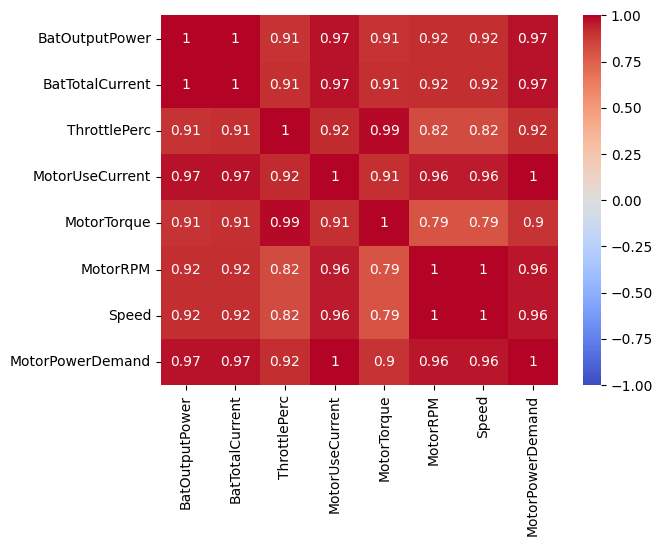

In [24]:
#make a new heatmap based on the limited df correlation_matrix_new_df2

#floats = new_df1.select_dtypes(include="float64")
#correlation_matrix_new_df1 = floats.corr() 

#sns.heatmap(correlation_matrix_new_df1, vmin=-1, vmax=1, annot=True, cmap="coolwarm")


floats = correlation_matrix_new_df2.select_dtypes(include="float64")
correlation_matrix_new_df2 = floats.corr() 

sns.heatmap(correlation_matrix_new_df2, vmin=-1, vmax=1, annot=True, cmap="coolwarm")


The features with a r values >0.5 are BatTotalCurrent, ThrottelPerc, MotorUseCurrent, MotorTorque

In [25]:
#split data in features x and target y

X = correlation_matrix_new_df2.drop(columns=["BatOutputPower"]).values
y = correlation_matrix_new_df2["BatOutputPower"].values

X.shape, y.shape

((8, 7), (8,))

HERE STOPS THE FIRST PART OF THE ANALYSIS

MULTIPLE LINEAR REGRESSION, try to make a model that firs the data with multiple coefficienrts

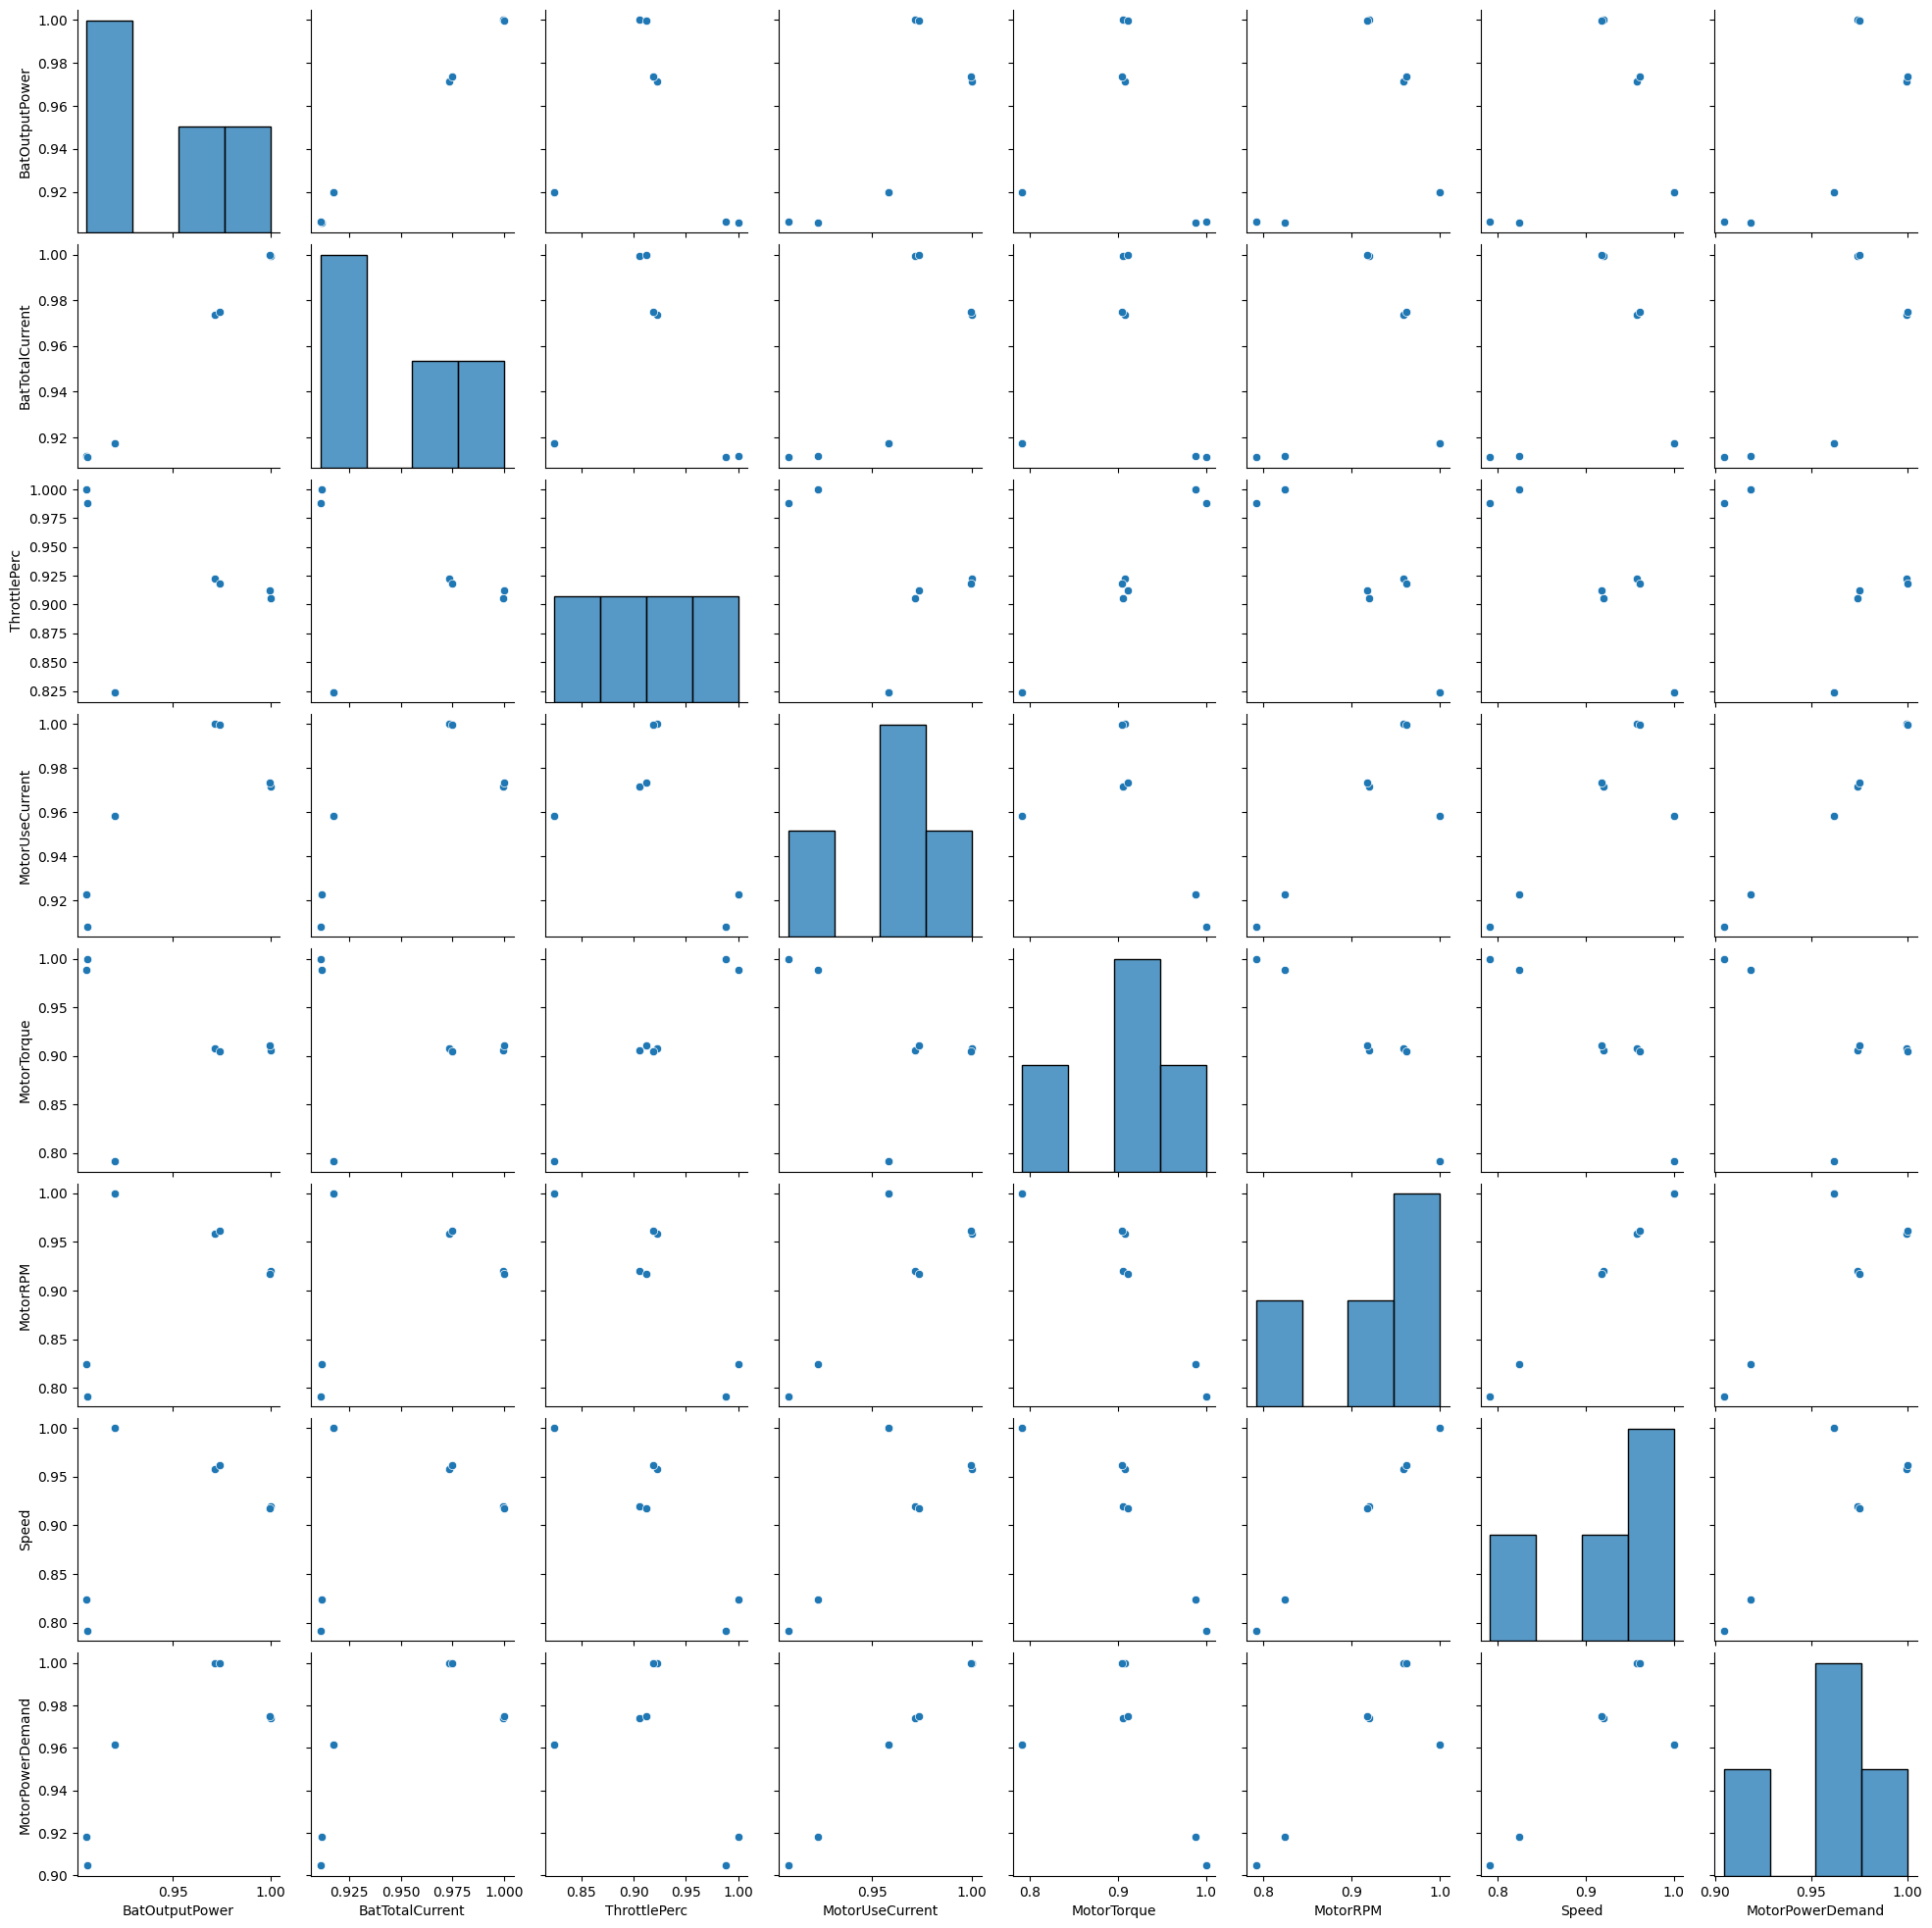

In [26]:
# Plot all columns against each other using pairplot
sns.pairplot(correlation_matrix_new_df2)
plt.show()

In [27]:
pip install statsmodels


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:


# scipy
from scipy.stats import linregress
from scipy.stats import t as tstats

# statsmodels (and patsy)
import statsmodels.api as sm
from patsy import dmatrices

import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
#make a designmatrics with a dummy value Xo=1 for intercept
y, X_multiple = dmatrices('BatOutputPower ~ MotorPowerDemand + Speed + MotorRPM + MotorTorque + MotorUseCurrent + ThrottlePerc + BatTotalCurrent', data=correlation_matrix_new_df2, return_type='dataframe')
X_multiple


,Intercept,MotorPowerDemand,Speed,MotorRPM,MotorTorque,MotorUseCurrent,ThrottlePerc,BatTotalCurrent
BatOutputPower,1.0,0.973796,0.920014,0.920014,0.906207,0.971488,0.905723,0.999553
BatTotalCurrent,1.0,0.974904,0.917619,0.917619,0.911239,0.973446,0.911934,1.000000
ThrottlePerc,1.0,0.918381,0.824094,0.824094,0.988183,0.922839,1.000000,0.911934
MotorUseCurrent,1.0,0.999592,0.958132,0.958132,0.907924,1.000000,0.922839,0.973446
MotorTorque,1.0,0.904643,0.791422,0.791422,1.000000,0.907924,0.988183,0.911239
MotorRPM,1.0,0.961643,1.000000,1.000000,0.791422,0.958132,0.824094,0.917619
Speed,1.0,0.961643,1.000000,1.000000,0.791422,0.958132,0.824094,0.917619
MotorPowerDemand,1.0,1.000000,0.961643,0.961643,0.904643,0.999592,0.918381,0.974904


In [31]:
result_multiple = sm.OLS(y, X_multiple).fit()
print('Summary of multiple linear regression BatOutputPower ~ MotorPowerDemand + Speed + MotorRPM + MotorTorque + MotorUseCurrent + ThrottlePerc + BatTotalCurrent\n')
print(result_multiple.summary())

Summary of multiple linear regression BatOutputPower ~ MotorPowerDemand + Speed + MotorRPM + MotorTorque + MotorUseCurrent + ThrottlePerc + BatTotalCurrent

                            OLS Regression Results                            
Dep. Variable:         BatOutputPower   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.519e+22
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.26e-12
Time:                        00:08:40   Log-Likelihood:                 231.40
No. Observations:                   8   AIC:                            -448.8
Df Residuals:                       1   BIC:                            -448.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t    

/home/joelva/.pyenv/versions/3.11.5/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [32]:
print(f"Computed:\n{result_multiple.params/result_multiple.bse}\n")
print(f"Actual:\n{result_multiple.tvalues}")   

Computed:
Intercept           6.135528e+06
MotorPowerDemand    4.398670e+08
Speed              -4.648399e+06
MotorRPM           -4.648399e+06
MotorTorque        -1.642847e+06
MotorUseCurrent    -6.205894e+08
ThrottlePerc        2.817375e+05
BatTotalCurrent     7.027592e+09
dtype: float64

Actual:
Intercept           6.135528e+06
MotorPowerDemand    4.398670e+08
Speed              -4.648399e+06
MotorRPM           -4.648399e+06
MotorTorque        -1.642847e+06
MotorUseCurrent    -6.205894e+08
ThrottlePerc        2.817375e+05
BatTotalCurrent     7.027592e+09
dtype: float64


The coefficients that are most determining for calculating the BatOutputPower is (MotorPowerDemand 1.0755)* (MotorUseCurrent -1.0639) * (BatTotalCurrent  0.9887)+ Intercept, which is close to 0 ( 6.135528e+06)

Note: The P value (0.00)  and R values(1.0) are too good to be true, what did i miss?

In [33]:
result_multiple.pvalues

Intercept           1.037596e-07
MotorPowerDemand    1.447301e-09
Speed               1.369546e-07
MotorRPM            1.369546e-07
MotorTorque         3.875100e-07
MotorUseCurrent     1.025831e-09
ThrottlePerc        2.259621e-06
BatTotalCurrent     9.058861e-11
dtype: float64

In [35]:
XX = np.array(X_multiple)
yy = np.array(y)


w = np.linalg.inv(XX.T @ XX) @ XX.T @ yy

# note that @ is the matrix multiplication operator

print(f"coeficients: \n{w}")

coeficients: 
[[-1.69986819e+00]
 [ 2.26690614e+00]
 [-1.12967570e+05]
 [ 1.12967745e+05]
 [-1.05723888e-03]
 [-1.06391831e+00]
 [ 1.02125133e-04]
 [ 9.88749586e-01]]


Complexities with Multiple linear regression

Construct a linear regression for this problem-NOT to create a near regr model but to find out which features correlatie with the target BatOutputPower .

If using linear regression, the assumption is that one or more of the \beta values is not zero
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_{100} x_{100}$$

Further, how good the model is working can be measuredvia the loss, the lower the loss, the better the model. Loss is the squared sum of (the actual values - estimated target values (y-hat, in our case BatOutputPower)) divided by sampel size

$$L = \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2 + \alpha \frac{1}{2} \sum_j \beta_j^2$$ 


45+ features and countless datapoints is too muchm restrain the weights ny adding penalty to the loss fucntion=REGULARIZATION

Ridge reegression (L2) adding the square of every weight as penalty 

$$L = \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2 + \alpha \frac{1}{2} \sum_j \beta_j^2$$ 
We try to minimize L. thus every Beta values should be minimized-whcih avorites models with lower weight. 

Lasso regression (L1) adding tabolute value of the  weight as penalty 
$$L = \frac{1}{n} \sum_i (y_i - \hat{y}_i)^2 + \alpha \sum_j |\beta_j|$$

The difference is that L1 will generate more thin/meer verspreid  weight and therefor L1 is more used for feature selection, which is what we want now


NOTE, the KS Tests failed due to my coding ability...